In [1]:
import os
import sys
import pandas as pd
import numpy as np
import regex as re
import mygene
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit, fminbound
from tableanalyzer import *

In [5]:
mg = mygene.MyGeneInfo()

In [3]:
#mg.getgene("ENSG00000221782", 'name,symbol,refseq.rna,type_of_gene,exac.bp')

In [2]:
working_dir = "/Users/filippo/Developer/tesi"
os.chdir(working_dir)
dirs = os.listdir("data")

In [3]:
len(dirs)

8935

In [7]:
df = pd.read_csv(("%s/mainTable.csv"%working_dir))
genes = np.array([gene[:15] for gene in df.loc[:,'gene'].values])
df['gene'] = genes
#df = df.to_sparse(fill_value=0.)
df.head()

,gene,85593c7d-7441-4d41-81d3-aaa17c7e398b.F,bfeaa9f7-e413-40b8-86ba-c9d26a96c240.F,426b94fe-fcff-49f2-9d0b-c7cb49bb5559.F,38083e21-7761-47c7-9112-769c7f85e283.F,6e2570b0-fc95-4ba9-a8a5-b79f6dea0246.F,21800024-cf76-4185-b57b-526539ccdba2.F,1f0f7598-d8c0-41ba-8b07-c958fecbb5f7.F,ea50d2da-4f84-46dc-8036-c34392793aed.F,7b2c7499-15c0-4926-a12c-4561df34954b.F,...,bd556315-a050-465f-9a41-bdebe7e3eb61.F,fde7c419-b8c0-4e04-8512-0e3b8eadebda.F,46551ef6-d1de-43c3-8ea5-5ade8a5bffd7.F,1a587b92-0a11-47f0-83c2-77a2b6de1088.F,171f664b-3226-4944-9219-91d2a7fdfb5f.F,9c77be54-d58e-4dec-8894-acb71a12cac5.F,2556ce90-db5f-4beb-897a-db3cf556e054.F,234724ab-6f82-4ac9-9948-37ffd9c3e418.F,cd550979-69b5-43d0-9724-cc25eb502cb8.F,03872f69-93f5-4d6c-aeb3-dadbc2762682.F
0,ENSG00000242268,0.076913,0.000000,0.137506,0.841950,0.522683,0.436242,0.062384,0.902013,0.000000,...,0.000000,0.046059,0.027827,0.000000,0.975612,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENSG00000270112,0.007115,0.000000,0.010902,0.025961,0.616454,0.207531,0.025968,0.060075,1.020406,...,0.000000,0.019172,0.003861,0.031637,0.118014,0.000000,0.016449,0.000000,0.003548,0.000000
2,ENSG00000167578,6.736458,3.268259,0.804157,4.580433,3.330552,3.467188,1.923817,4.086256,2.477979,...,1.933432,4.589182,2.509192,1.182190,4.894803,3.463509,3.816159,2.281180,2.112157,11.051738
3,ENSG00000273842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237,4.449834,3.115587,1.536337,3.729699,3.989718,6.747617,3.787525,4.364158,4.201916,...,4.181816,15.874804,2.699238,6.278986,3.378318,6.234426,5.366732,2.985039,4.456480,3.583194


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Columns: 5001 entries, gene to 03872f69-93f5-4d6c-aeb3-dadbc2762682.F
dtypes: float64(5000), object(1)
memory usage: 54.3+ MB


In [8]:
ngenes = len(df['gene'])
nfiles = len(df.loc[0,:])-1
print("genes:%d\trealizations:%d"%(ngenes,nfiles))

genes:60483	realizations:5000


In [ ]:
np.sum(df[:,df.keys()[4]])

## Means sigmas

In [10]:
df_mv = pd.read_csv("meanVariances.csv", index_col = [0])
#df_mv = df_mv.loc[df_mv['type_of_gene']=='protein-coding']
df_mv = df_mv.loc[df_mv['type_of_gene']=='microRNA']
df_mv.head()

,mean,type_of_gene,variance,occurrence
ENSG00000277889,0.012846,microRNA,0.008601,203.0
ENSG00000263834,1.192730,microRNA,4.501360,3712.0
ENSG00000263631,0.004190,microRNA,0.002808,47.0
ENSG00000277073,0.013996,microRNA,0.007812,230.0
ENSG00000266392,1.741025,microRNA,7.022659,4226.0


In [12]:
means = df_mv['mean'].values
variances = df_mv['variance'].values
occurrences = np.array(df_mv['occurrence'].values, dtype=long)
len(means)

1424

### plot

#### **var** versus **mean**

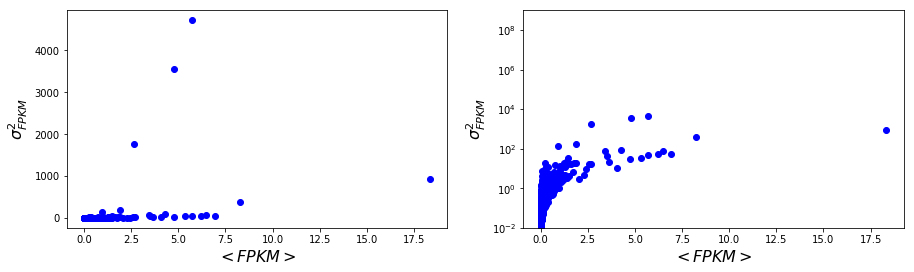

In [13]:
fig=plt.figure(figsize=(15,4))
plt.subplot(121)
plt.scatter(means, variances, c='b')
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.subplot(122)
plt.scatter(means, variances, c='b')
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.yscale('log')
#plt.xlim(1e-2,200)
plt.ylim((1e-2,1e9))
plt.show()

In [14]:
fig.savefig("varmean.png")

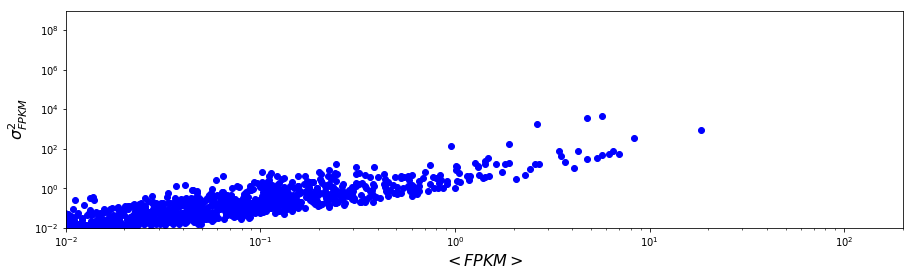

In [15]:
fig=plt.figure(figsize=(15,4))
plt.scatter(means, variances, c='b')
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-2,200)
plt.ylim((1e-2,1e9))
plt.show()
fig.savefig("varmean_loglog.png")

### mean versus occurrence

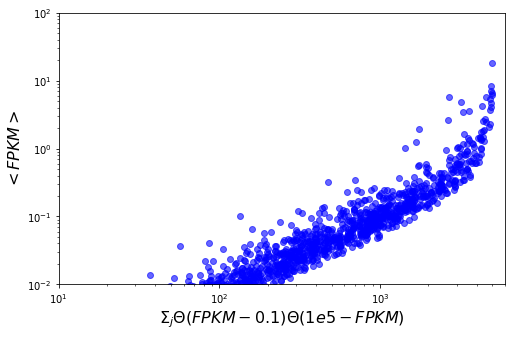

In [22]:
fig=plt.figure(figsize=(8,5))
plt.scatter(occurrences, means, c='b', alpha=0.6)
plt.ylabel("$<FPKM>$", fontsize=16)
plt.xlabel("$\Sigma_j\Theta(FPKM-0.1)\Theta(1e5-FPKM)$", fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-2,1e2)
plt.xlim(1e1,6e3)
plt.show()

In [23]:
fig.savefig("meanDiff_loglog.png")

### Distributions

In [24]:
len(means)

1424

In [25]:
len(variances)

1424

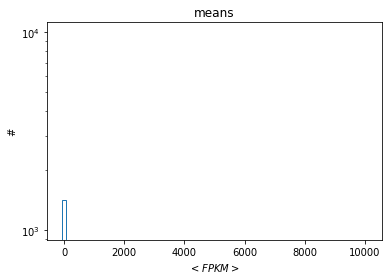

In [26]:
bins = 80
_range = (0-1e4*0.5/bins, 1e4+1e4*0.5/bins)
fig = plt.figure()
n, c, _ = plt.hist(means, density = False, range=_range, bins=bins, histtype='step')
plt.title("means")
plt.xlabel("$<FPKM>$")
plt.ylabel("#")
plt.yscale('log')
plt.show()
fig.savefig("mean_distr.pdf")

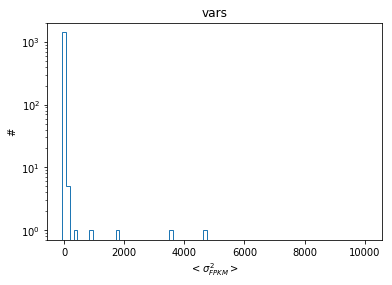

In [27]:
bins = 80
_range = (0-1e4*0.5/bins, 1e4+1e4*0.5/bins)
fig = plt.figure()
n, c, _ = plt.hist(variances, density = False, histtype='step', bins=bins, range=_range)
plt.title("vars")
plt.xlabel("$<\sigma_{FPKM}^2>$")
plt.ylabel("#")
plt.yscale('log')
plt.show()
fig.savefig("var_distr.pdf")

# protein coding genes

In [ ]:
protein_coding = pd.read_csv("genes.txt", header=[0], index_col=[0])
protein_coding.loc[protein_coding['type_of_gene']=='protein-coding'].index.values

# expression plot

In [ ]:
sample = 10
fig = plt.figure()
x = np.linspace(0, 20000)
key = df.keys()[sample]
plt.plot(df[key].to_dense(), 'o', label=key[:-2])
plt.plot(x, [100 for _ in x], 'r--', lw=4, label='threshold (100)')
plt.xlabel("gene", fontsize=16)
plt.ylabel("FPKM", fontsize=16)
plt.legend()
plt.show()

In [ ]:
fig.savefig("singleFile.pdf")

# single gene

name: ENSG00000221782
FPKM mean:       4.84
FPKM var:     318.49


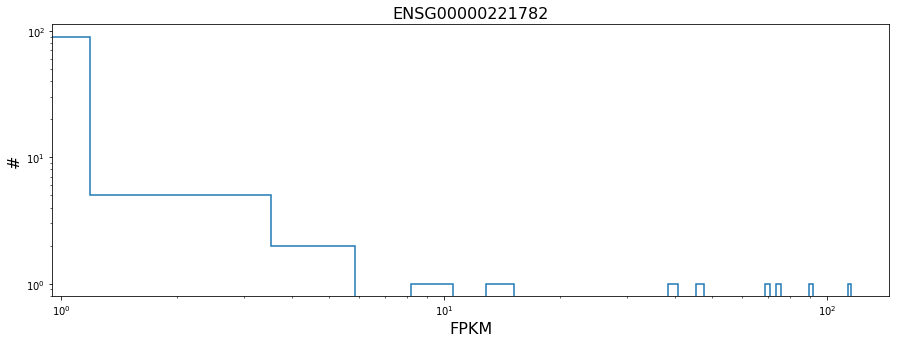

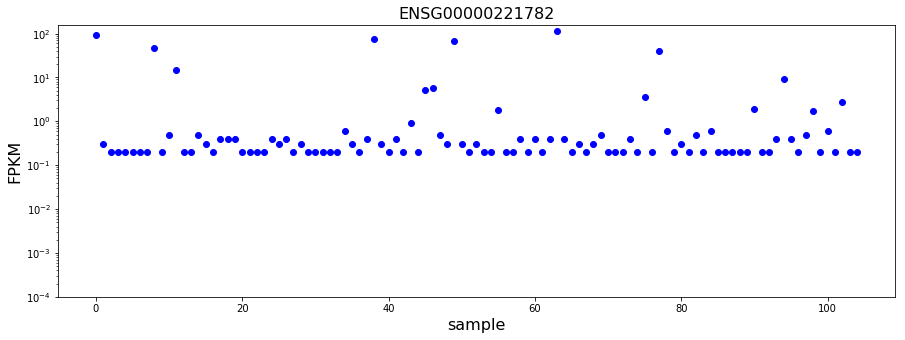

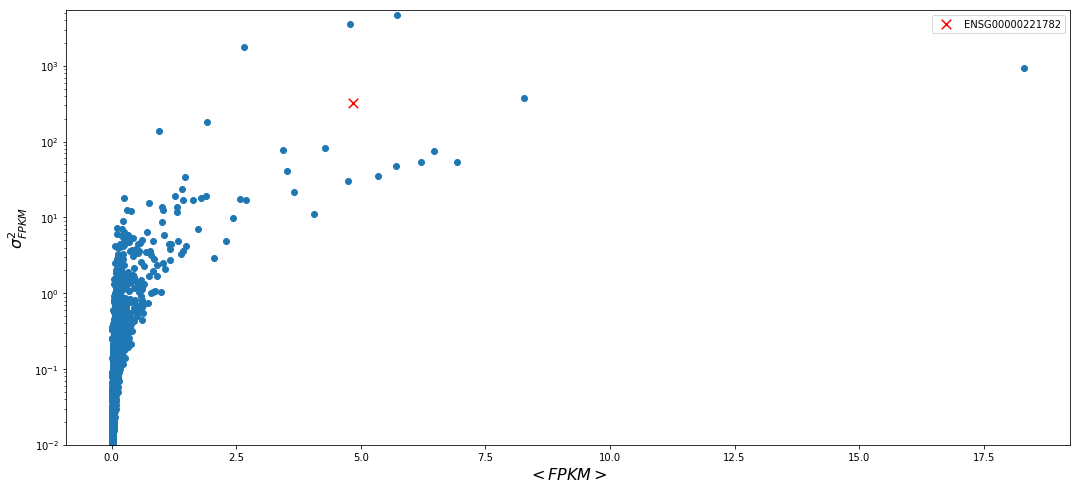

In [29]:
gene = geneinfo('ENSG00000221782', df, nfiles)
genedistr(gene, 50);
geneplot(gene);
genecoord(gene, means, variances);

# subset analysis

#### query genes

In [ ]:
search_mean_max = 200
search_mean_min = 50
search_var_max = 1e12
search_var_min = 1e6
pc = True
if (pc):
    query_result = df_mv.loc[(df_mv['type_of_gene']=='protein-coding')&((df_mv['mean']>(search_mean_min)) & (df_mv['mean']<(search_mean_max))) & ((df_mv['variance']>(search_var_min)) & (df_mv['variance']<(search_var_max)))].sort_values(by='mean')
else:
    query_result = df_mv.loc[((df_mv['mean']>(search_mean_min)) & (df_mv['mean']<(search_mean_max))) & ((df_mv['variance']>(search_var_min)) & (df_mv['variance']<(search_var_max)))].sort_values(by='mean')
query_result

In [ ]:
genesnames = []
for g in query_result.index.values[:15]:
    gene = geneinfo(g[:15], df, nfiles)
    genesnames.append(gene)

### plot coordinates

In [ ]:
fig = plt.figure(figsize=(18,8))
plt.scatter(means, variances)
for g in genesnames:
    plt.scatter([g['avg']],[g['var']], marker='x', s=90, label=g['name'])
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.yscale('log')
#plt.xlim(1e-2,200)
#plt.ylim((1e-5,1e8))
plt.ylim((1e-5,1e10))
plt.legend()
plt.show()
fig.savefig("plot/genes/subset.png")

### plot all

In [ ]:
for gene in genesnames:
    print(gene['name'])
    print("mean: %f"%gene['avg'])
    print("var: %f"%gene['var'])
    genedistr(gene, 80);
    #geneplot(gene);
    #genecoord(gene);

In [ ]:
genename='ENSG00000159763'
gene = geneinfo(genename, df, nfiles)

In [ ]:
def powgaus(x, a, b, c, d, e):
    return np.exp(a*np.power(x,-b)) - 1 + e*(np.exp(np.exp(-(x-c)*(x-c)/d)) - 1)

In [ ]:
fitfunc = powgaus

In [ ]:
xscale = 'linear'
yscale='log'
bins = 30
fig = plt.figure(figsize=(10,4))
ax = fig.subplots()
counts, bin_edges, _ = ax.hist(gene['data'], histtype='step', bins=bins, range=(0,1e4))
bin_centres = (bin_edges[1:]+bin_edges[:-1])/2.
ax.errorbar(bin_centres, counts, np.sqrt(counts), None, 'bo', label='data')
bounds = ([2, 0.3, 3000, 1000, 0.01],[1000, 0.7, 5000, 500000, 3])
popt, pcov = curve_fit(fitfunc, bin_centres, counts, bounds=bounds)
print(popt)
x = np.linspace(bin_centres[0],1e4)
ax.set_title(gene['name'], fontsize=18)
ax.set_xlabel("$FPKM$")
ax.set_ylabel("#")
ax.set_yscale(yscale)
ax.set_xscale(xscale)
minimum = fminbound(fitfunc, 100, 1500, args=(popt[0],popt[1],popt[2],popt[3],popt[4]))
plt.plot(x, fitfunc(x, *popt), 'r', label='fit')
plt.plot(x, np.exp(popt[0]*np.power(x,-popt[1])) - 1, label='$e^{a*x^{-b}}$')
plt.plot(x, popt[4]*np.exp(np.exp(-(x-popt[2])*(x-popt[2])/popt[3])) - popt[4], label="$C(e^{e^{- (x-\mu)^2\sigma^{-2}}}-1)$")
plt.text(0.5, 0.45, 'min: %6.1f'%minimum, horizontalalignment='left',verticalalignment='top', fontsize=16, transform=ax.transAxes)
plt.text(0.5, 0.4, '(a, b, $\mu$, $\sigma$, C):\n(%d, %4.2f, %d, %d, %3.1f)'%(popt[0],popt[1],popt[2],popt[3],popt[4]), horizontalalignment='left',verticalalignment='top', fontsize=16, transform=ax.transAxes)
plt.ylim(1,2e4)
plt.legend(fontsize=14)
plt.show()

In [ ]:
fig.savefig("%s_fit_%s%s.pdf"%(genename, xscale, yscale))

# null

In [ ]:
df_null = pd.read_csv(("%s/nullTable.csv"%working_dir), header=None, index_col=None)

In [ ]:
df_null.head()

In [ ]:
means_null = [np.average(df_null.loc[i,df_null.keys()[1:]].values) for i,g in enumerate(df_null.loc[:,df_null.keys()[0]].values)]
variances_null = [np.var(df_null.loc[i,df_null.keys()[1:]].values) for i,g in enumerate(df_null.loc[:,df_null.keys()[0]].values)]

In [ ]:
fig=plt.figure()
plt.scatter(means, variances, label='data')
plt.scatter(means_null, variances_null, label='null')
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.legend(fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1, 1e8)
plt.xlim(1e-1,1e4)
plt.show()

In [ ]:
fig.savefig("varmean_null.pdf")

## data size Heaps check

In [ ]:
col = df.loc[:,df.keys()[1]].values
np.sum(col)

In [ ]:
len(col[col.nonzero()])

In [ ]:
x = []
y = []
for i in range(1, 1000):
    col = df.loc[:,df.keys()[i]].values
    x.append(np.sum(col))
    y.append(len(col[col.nonzero()]))
plt.scatter(x,y)